### Twitter Sentiment Analysis Using Machine Learning

We aim to analyze the **Twitter Sentiment Analysis Dataset** using machine learning algorithms. The sentiment of tweets is provided by the **Sentiment140 dataset**.

To achieve this, we develop a **machine learning pipeline** involving the following components:

1. **Text Representation:**
   - Use **Term Frequency-Inverse Document Frequency (TF-IDF)** to transform the tweet text into numerical features suitable for machine learning algorithms.  
   
   

2. **Classifiers:**
     - **Logistic Regression**

The performance of these classifiers is evaluated using the following metrics:
- **Accuracy:** Measures the percentage of correctly classified tweets. ( (TP + TN)/(TP + TN + FP + FN))
- **F1 Score:** Provides a balance between precision and recall. (Metric used to evaluate the performance of a classification model, especially when there is an **imbalance in the dataset** (e.g., one class has significantly more samples than the other). It is the **harmonic mean** of **Precision** and **Recall**, providing a balanced measure of the two. 2*((Precision*Recall) / (Precision+Recall))

Precision= TP/TP+FP
Recall=TP/TP+FN

 




By implementing this pipeline, we aim to:
- Predict the sentiment of tweets as either **positive** or **negative**.
- Compare the effectiveness of different classifiers on the Sentiment140 dataset.
- Provide insights into the best-performing model for sentiment analysis.



### Step 1. Import the Necessary Dependencies

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### Step-2: Read and Load the Dataset

In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twitterdata.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
478718,0,2178634508,Mon Jun 15 07:59:24 PDT 2009,NO_QUERY,petterk,"Went to upload my assignment, but the website ..."
533370,0,2197110211,Tue Jun 16 13:21:20 PDT 2009,NO_QUERY,ElaineHolbon,I so wish I had time for motorsport this year....
792590,0,2326334237,Thu Jun 25 06:53:43 PDT 2009,NO_QUERY,Mzpurrfection,"@PLPhotography cool thats wzzup, damn u saw it..."
49633,0,1678210454,Sat May 02 05:55:53 PDT 2009,NO_QUERY,Shotshog,"Kin ell still working, my brother needed a han..."
440102,0,2066616206,Sun Jun 07 10:51:19 PDT 2009,NO_QUERY,zenFish,@donnamatrix sorry to hear the night was bad.


### Step-3: Exploratory Data Analysis

In [3]:
#  Five top records of data
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# Columns/features in data
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
# Length of the dataset 
print('length of data is', len(df))

length of data is 1600000


In [6]:
# Shape of the dataset 
df. shape

(1600000, 6)

In [7]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
# Datatypes of all columns
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
# Checking for missing values 
np.sum(df.isnull().any(axis=1))

0

In [10]:
# Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [11]:
# Check unique targe vaues 
df['target'].unique()

array([0, 4], dtype=int64)

In [12]:
# How many unique values are there
df['target'].nunique()

2

### Step-4: Data Visualization of Target Variables

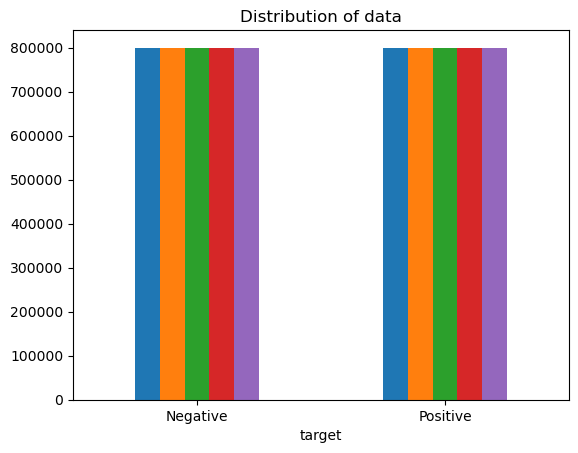

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

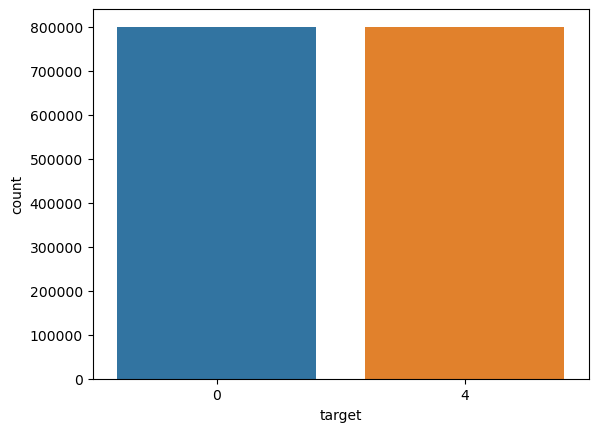

In [14]:
import seaborn as sns
sns.countplot(x='target', data=df)

### Step-5: Data Preprocessing

### Data Pre-Processing Steps

In the above-given problem statement, before training the model, we performed various pre-processing steps on the dataset to clean and prepare the text data. These steps included:

1. **Removing Stopwords:**
   - Commonly used words (e.g., "is", "and", "the") that do not contribute significant meaning to the text were removed.

2. **Removing Special Characters:**
   - Emojis, hashtags, and other special characters were removed to focus on the textual content.

3. **Converting Text to Lowercase:**
   - The entire text document was converted into lowercase for better generalization and consistency.

4. **Cleaning Punctuations:**
   - Punctuations were cleaned and removed to reduce unnecessary noise from the dataset.

5. **Removing Repeating Characters:**
   - Repeated characters in words were removed to normalize the text (e.g., "cooool" → "cool").

6. **Removing URLs:**
   - URLs were removed from the text as they do not provide significant value for sentiment analysis.

7. **Stemming and Lemmatization:**
   - **Stemming:** Reduced words to their derived stems (e.g., "running" → "run").
   - **Lemmatization:** Reduced words to their root form, known as lemma (e.g., "better" → "good").

These pre-processing steps helped clean the dataset, remove noise, and standardize the text, ultimately leading to better model performance.


In [15]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [16]:
# Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
data['target'] = data['target'].replace(4,1)

C:\Users\Datamotus\AppData\Local\Temp\ipykernel_19000\1081914997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [17]:
# Printing unique values of target variables (to check replacement)
data['target'].unique()

array([0, 1], dtype=int64)

In [18]:
#  Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [19]:
# Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [20]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [21]:
# Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset.tail()

,text,target
19995,"not much time off this weekend, work trip to m...",0
19996,one more day of holidays,0
19997,feeling so down right now .. i hate you damn h...,0
19998,"geez,i hv to read the whole book of personalit...",0
19999,i threw my sign at donnie and he bent over to ...,0


In [22]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['text']=dataset['text'].apply(lambda text:cleaning_stopwords(text))

In [24]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
print(dataset['text'].tail())
print(english_punctuations)

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [26]:
# Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [27]:
# Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [28]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset.head(3)

,text,target
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1


In [29]:
# Applying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [30]:
# Applying lemmatizer
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    # Return the lemmatized version of each word in the list
    return [lm.lemmatize(word) for word in data]

# Apply the lemmatizer to each row of the 'text' column
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))

# View the first few rows
dataset['text'].head()


800000              [love, healthuandpets, u, guy, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurt, much, eat, real, f...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [41]:
# Separating input feature and label
X=dataset.text
y=dataset.target

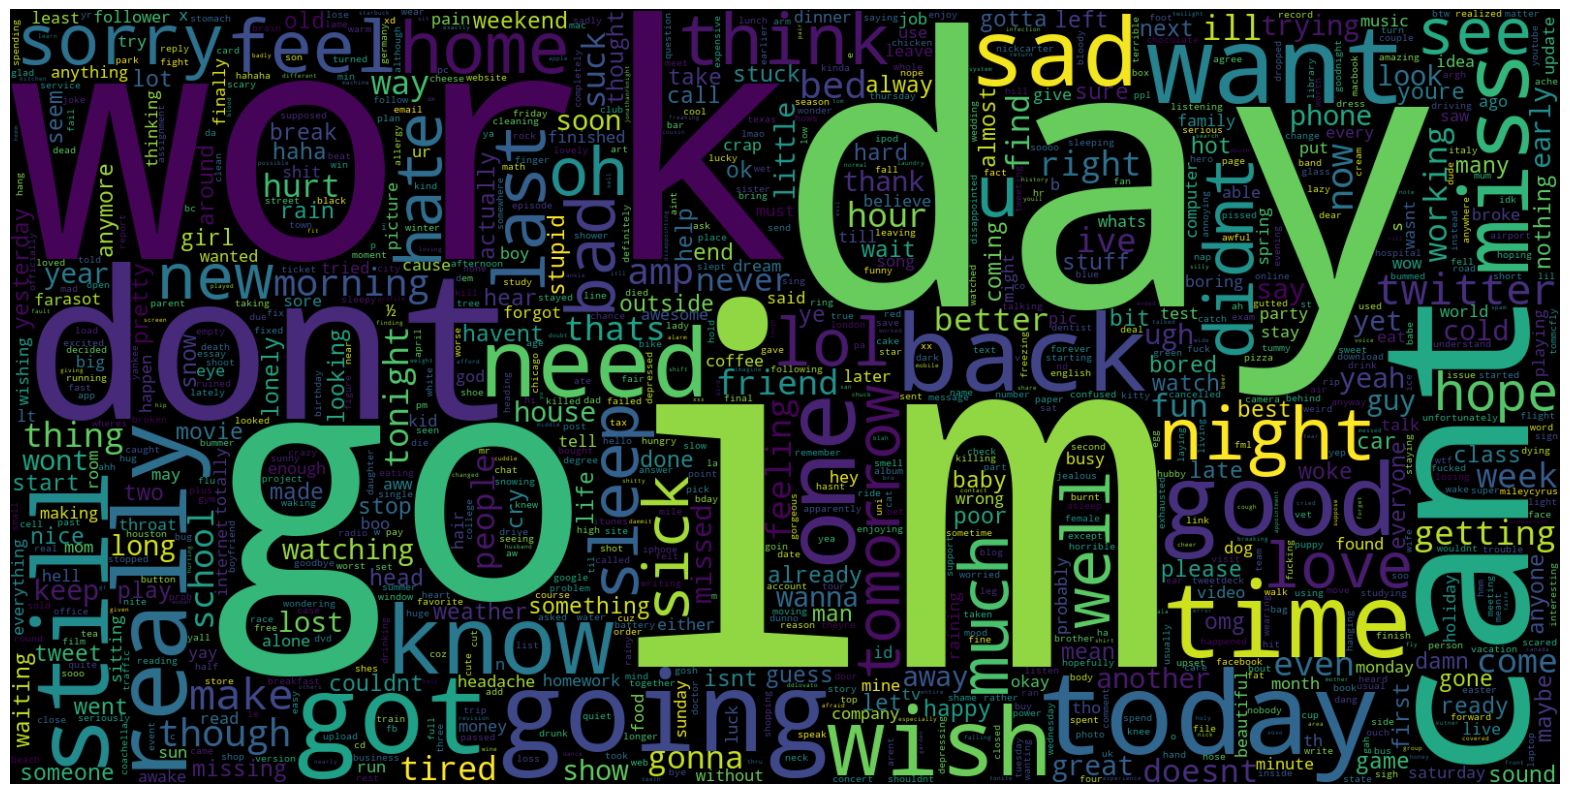

In [51]:
# Plot a cloud of words for negative tweets
negative_tweets = dataset[dataset['target'] == 0]['text']

negative_text = " ".join([" ".join(words) for words in negative_tweets])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(negative_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes for better visualization
plt.show()

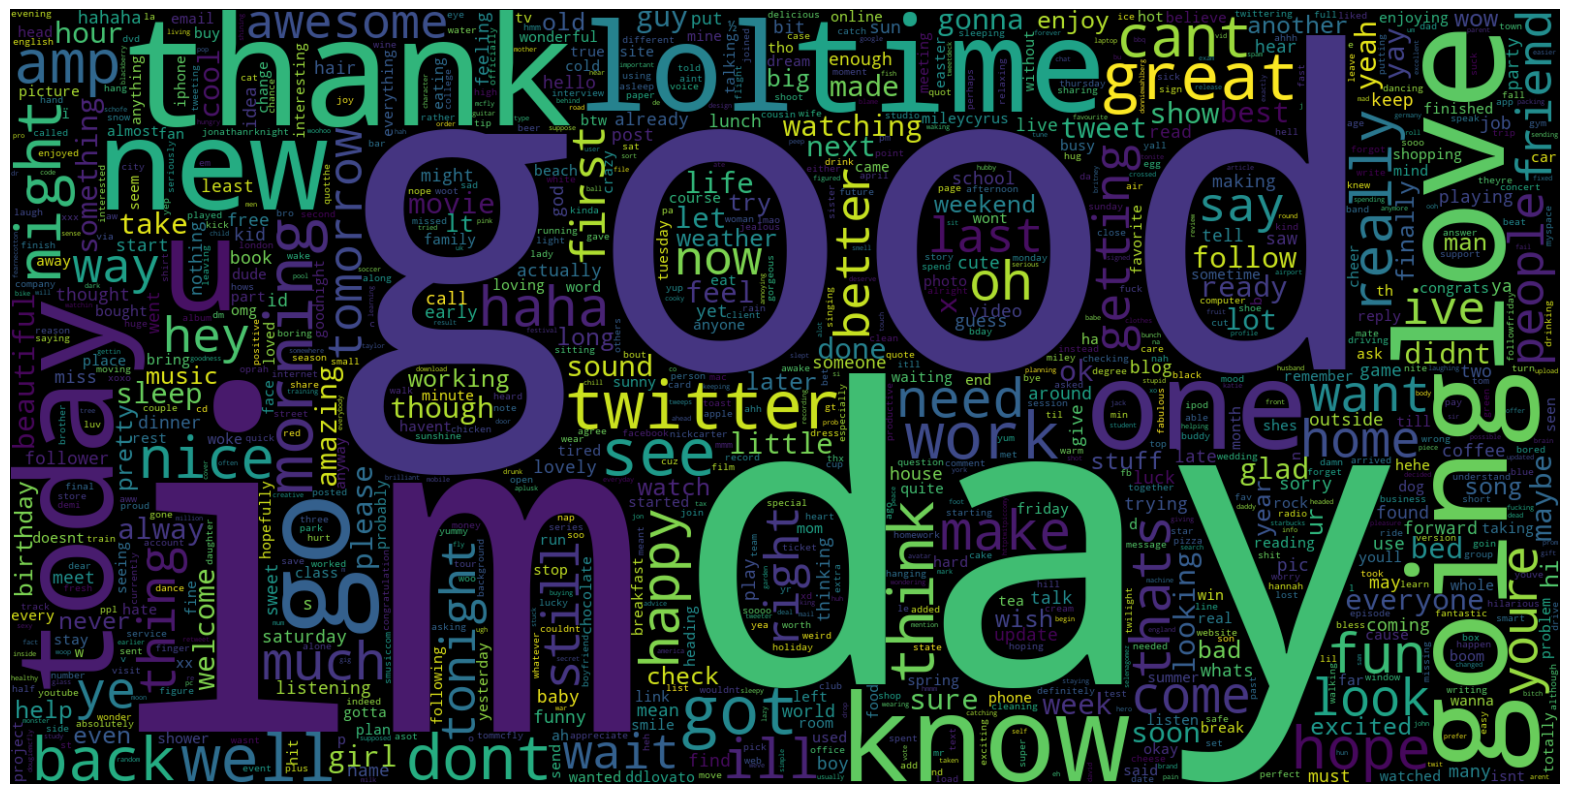

In [53]:
# Plot a cloud of words for positive tweets
positive_tweets = dataset[dataset['target'] == 1]['text']

positive_text = " ".join([" ".join(words) for words in positive_tweets])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.show()

### Step-6: Splitting Our Data Into Train and Test Subsets

In [54]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

### Step-7: Transforming the Dataset Using TF-IDF Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Define the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit the number of features to speed up computation
    stop_words='english',  # Remove common English stop words
    ngram_range=(1, 2)  # Use unigrams and bigrams
)

# Step 2: Convert X_train and X_test to string (if necessary)
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Step 3: Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Step 4: Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Output shapes
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Train Shape: (38000, 5000)
TF-IDF Test Shape: (2000, 5000)


### Step-8: Train Logistic Regression

In [58]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test_tfidf)

print("Logistic Regression Model Trained Successfully")

Logistic Regression Model Trained Successfully


### Step-9: Evaluate the Model

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 9.1: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9.2: Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       991
           1       0.74      0.76      0.75      1009

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



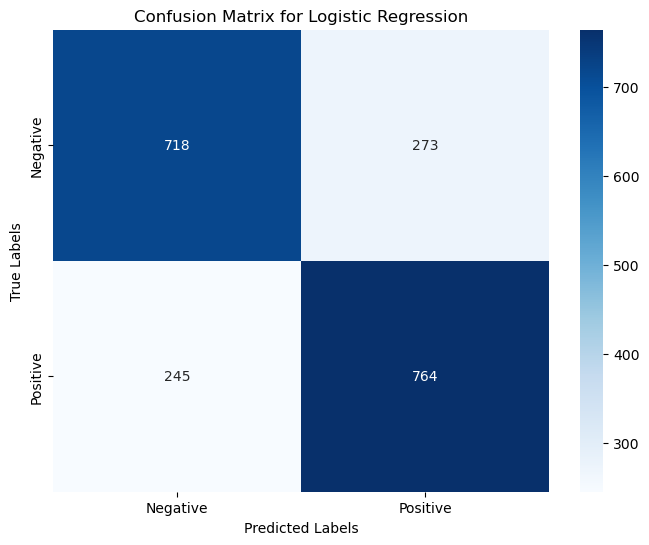

In [60]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
